In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

In [3]:
#loading the two datasets
sensitive_1 = pd.read_csv('sensitive_responses.csv')
sensitive_2 = pd.read_csv('new_sensitive_responses.csv')

totalpeople = len(sensitive_1["Person"])


#writing down the actual number of people's answers
actualyes1 = len(sensitive_1[sensitive_1["Response"] == "Yes"])
actualno1 = len(sensitive_1[sensitive_1["Response"] == "No"])
actualyes2 = len(sensitive_2[sensitive_2["Response"] == "Yes"])
actualno2 = len(sensitive_2[sensitive_2["Response"] == "No"])

print("For the first dataset: Yes: ", actualyes1, "No: ", actualno1)
print("For the second dataset: Yes: ", actualyes2, "No: ", actualno2)

For the first dataset: Yes:  46 No:  54
For the second dataset: Yes:  53 No:  47


In [4]:
#for the first sensitive dataset
yescount_1 = 0
nocount_1 = 0
for i in range(0,totalpeople):
    coin1 = random.randint(1,2) #heads is 1 tails is 2
    if coin1 == 1: #if the coin flipped reveals a tails then we flip the coin again
        coin2 = random.randint(1,2)
        if coin2==1: #if we get a heads for the second coin-flip then the response is "yes" regardless of the truth
            yescount_1 += 1
        if coin2 ==2: #if we get a tails for the second coin-flip then the response is "no" regardless of the truth
            nocount_1 += 1
    else: #if we get heads the code will look at the response of the csv file and determine if its "yes" or "no" (truthully)
        if sensitive_1["Response"].iloc[i] == "Yes":
            yescount_1+=1
        else:
            nocount_1+=1
print("For the first dataset: random yes = ",yescount_1)
print("For the first dataset: random no = ",nocount_1)
#calculating the proportions
yes_proportion_1 = yescount_1/totalpeople
 
# Estimate the true fraction of people with property P
estimated_p_1 = 2 * (yes_proportion_1 - 0.25)
estimated_p_1 = max(0, min(1, estimated_p_1))  # Ensure it's in range [0,1]
 
 
print(yes_proportion_1)
print(estimated_p_1)

For the first dataset: random yes =  45
For the first dataset: random no =  55
0.45
0.4


In [5]:
#for the second sensitive dataset
#for the first sensitive dataset
yescount_2 = 0
nocount_2 = 0
for i in range(0,totalpeople):
    coin1 = random.randint(1,2) #heads is 1 tails is 2
    if coin1 == 1: #if the coin flipped reveals a tails then we flip the coin again
        coin2 = random.randint(1,2)
        if coin2==1: #if we get a heads for the second coin-flip then the response is "yes" regardless of the truth
            yescount_2 += 1
        if coin2 ==2: #if we get a tails for the second coin-flip then the response is "no" regardless of the truth
            nocount_2 += 1
    else: #if we get heads the code will look at the response of the csv file and determine if its "yes" or "no" (truthully)
        if sensitive_2["Response"].iloc[i] == "Yes":
            yescount_2+=1
        else:
            nocount_2+=1
print("For the second dataset: random yes = ",yescount_2)
print("For the second dataset: random no = ",nocount_2)
 
#calculating the proportions
yes_proportion_2 = yescount_2/totalpeople
 
# Estimate the true fraction of people with property P
estimated_p_2 = 2 * (yes_proportion_2 - 0.25)
estimated_p_2 = max(0, min(1, estimated_p_2))  # Ensure it's in range [0,1]
 
 
print(yes_proportion_2)
print(estimated_p_2)

For the second dataset: random yes =  47
For the second dataset: random no =  53
0.47
0.43999999999999995


In [6]:
'''
this is the differential privacy formula:
Pr[M(x) ∈ S] ≤ exp(ε)Pr[M(y) ∈ S]+δ,
'''
# Define the range S (e.g., estimated proportions between 0.4 and 0.6)
lower_bound = 0.3
upper_bound = 0.7

# Simulate probabilities by checking if the estimated values fall within S
P_x = 1 if lower_bound <= estimated_p_1 <= upper_bound else 0
P_y = 1 if lower_bound <= estimated_p_2 <= upper_bound else 0

# Differential privacy check
epsilon = 0.1
delta = 0  # Pure DP
privacy_bound = np.exp(epsilon) * P_y + delta

print(f"P[M(x) ∈ S] = {P_x:.4f}, e^ε * P[M(y) ∈ S] + δ = {privacy_bound:.4f}")

P[M(x) ∈ S] = 1.0000, e^ε * P[M(y) ∈ S] + δ = 1.1052


P(M(x) ∈ S] = 1.0000, e^ε * P[M(y) ∈ S] + δ = 1.0010
P(M(x) ∈ S] = 1.0000, e^ε * P[M(y) ∈ S] + δ = 1.0101
P(M(x) ∈ S] = 1.0000, e^ε * P[M(y) ∈ S] + δ = 1.1052
P(M(x) ∈ S] = 1.0000, e^ε * P[M(y) ∈ S] + δ = 1.6487
P(M(x) ∈ S] = 1.0000, e^ε * P[M(y) ∈ S] + δ = 2.7183
P(M(x) ∈ S] = 1.0000, e^ε * P[M(y) ∈ S] + δ = 22026.4658


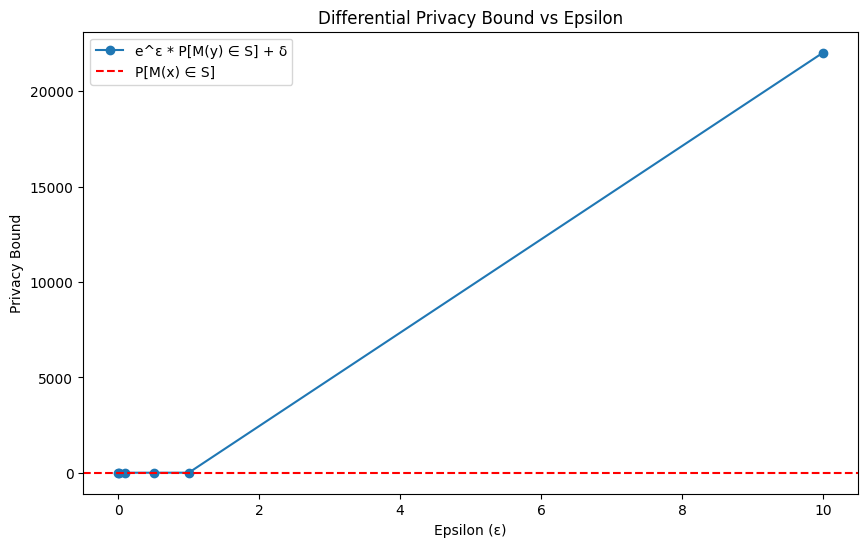

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range S (e.g., estimated proportions between 0.4 and 0.6)
lower_bound = 0.3
upper_bound = 0.7

# Simulate probabilities by checking if the estimated values fall within S
P_x = 1 if lower_bound <= estimated_p_1 <= upper_bound else 0
P_y = 1 if lower_bound <= estimated_p_2 <= upper_bound else 0

# Differential privacy check
epsilon_values = [0.001, 0.01, 0.1, 0.5, 1, 10]  # Different epsilon values
delta = 0  # Pure DP

#Storing the results for plotting
privacy_bounds = []

for epsilon in epsilon_values:
    privacy_bound = np.exp(epsilon) * P_y + delta
    privacy_bounds.append(privacy_bound)
    print(f"P(M(x) ∈ S] = {P_x:.4f}, e^ε * P[M(y) ∈ S] + δ = {privacy_bound:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, privacy_bounds, marker='o',label="e^ε * P[M(y) ∈ S] + δ")
plt.axhline(y=P_x, color='r', linestyle='--', label="P[M(x) ∈ S]")
plt.xlabel('Epsilon (ε)')
plt.ylabel('Privacy Bound')
plt.title('Differential Privacy Bound vs Epsilon')
plt.legend()
plt.show()
